In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# Load the data
df = pd.read_csv("Downloads/literacy_rates_nepal.csv")

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   District    75 non-null     object 
 1   Total       75 non-null     float64
 2   Female      75 non-null     float64
 3   Male        75 non-null     float64
 4    Year       75 non-null     int64  
 5   Gender_Gap  75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB
None

📊 Descriptive Statistics:
         Total     Female       Male    Year  Gender_Gap
count  75.0000  75.000000  75.000000    75.0   75.000000
mean   65.1120  56.053333  75.016000  2013.0   18.962667
std     9.5331  11.199968   8.464617     0.0    4.670169
min    41.7000  32.000000  50.900000  2013.0   12.200000
25%    57.0500  47.600000  69.300000  2013.0   15.650000
50%    66.2000  57.100000  76.200000  2013.0   17.400000
75%    71.9000  64.350000  80.900000  2013.0   20.150000
max 

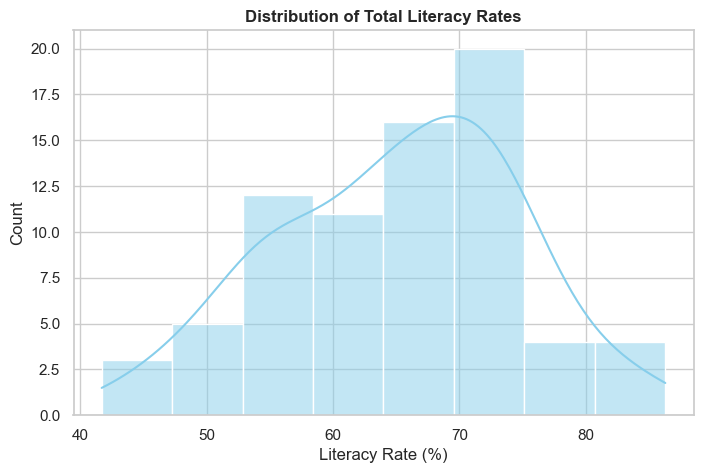

In [2]:
# Step 2: Basic cleanup
df.dropna(subset=['District', 'Total', 'Female', 'Male'], inplace=True)
df['Gender_Gap'] = df['Male'] - df['Female']

# Step 3: Summary statistics
print("🔍 Dataset Info:")
print(df.info())
print("\n📊 Descriptive Statistics:")
print(df.describe())

# Step 4: Average literacy rates
print("\n📌 National Averages:")
print("Average Total Literacy:", round(df['Total'].mean(), 2))
print("Average Female Literacy:", round(df['Female'].mean(), 2))
print("Average Male Literacy:", round(df['Male'].mean(), 2))
print("Average Gender Gap:", round(df['Gender_Gap'].mean(), 2))

# Step 5: Top & Bottom districts
top10 = df.sort_values('Total', ascending=False).head(10)
bottom10 = df.sort_values('Total', ascending=True).head(10)

# Step 6: Visualizations setup
sns.set(style='whitegrid', palette='Set2')

# A. Distribution of Total Literacy Rates
plt.figure(figsize=(8, 5))
sns.histplot(df['Total'], kde=True, color='skyblue')
plt.title("Distribution of Total Literacy Rates", fontweight='bold')
plt.xlabel("Literacy Rate (%)")
plt.grid(True)
plt.show()

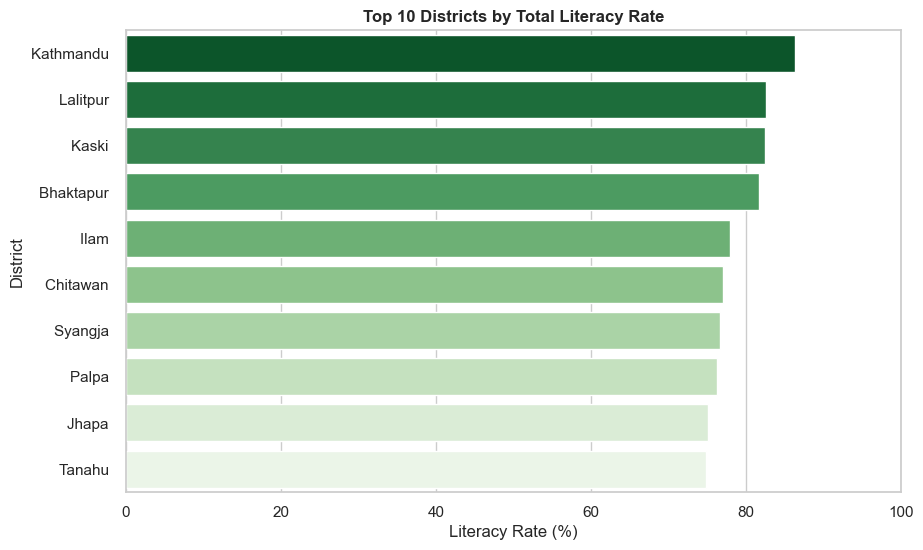

In [3]:
# B. Top 10 Districts by Literacy Rate
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='Total', y='District', palette='Greens_r')
plt.title("Top 10 Districts by Total Literacy Rate", fontweight='bold')
plt.xlabel("Literacy Rate (%)")
plt.ylabel("District")
plt.xlim(0, 100)
plt.show()

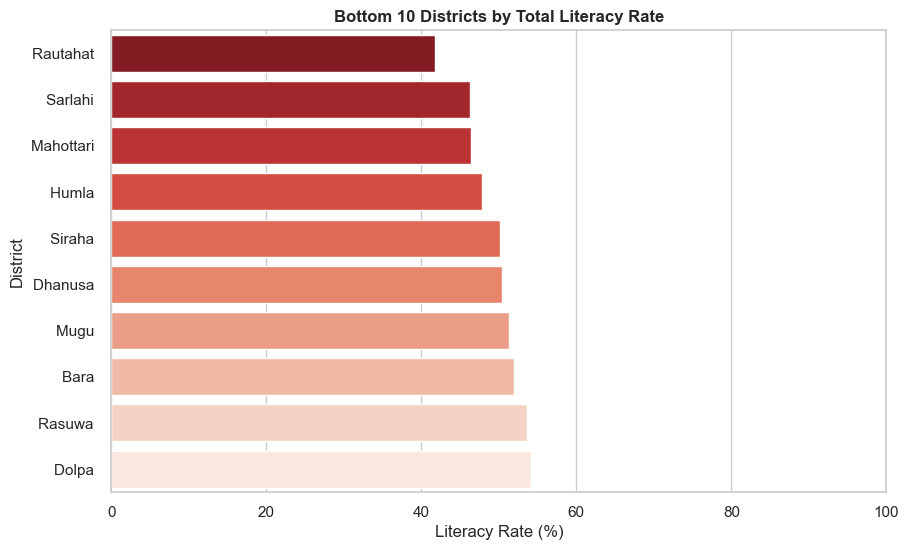

In [4]:
# C. Bottom 10 Districts by Literacy Rate
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom10, x='Total', y='District', palette='Reds_r')
plt.title("Bottom 10 Districts by Total Literacy Rate", fontweight='bold')
plt.xlabel("Literacy Rate (%)")
plt.ylabel("District")
plt.xlim(0, 100)
plt.show()

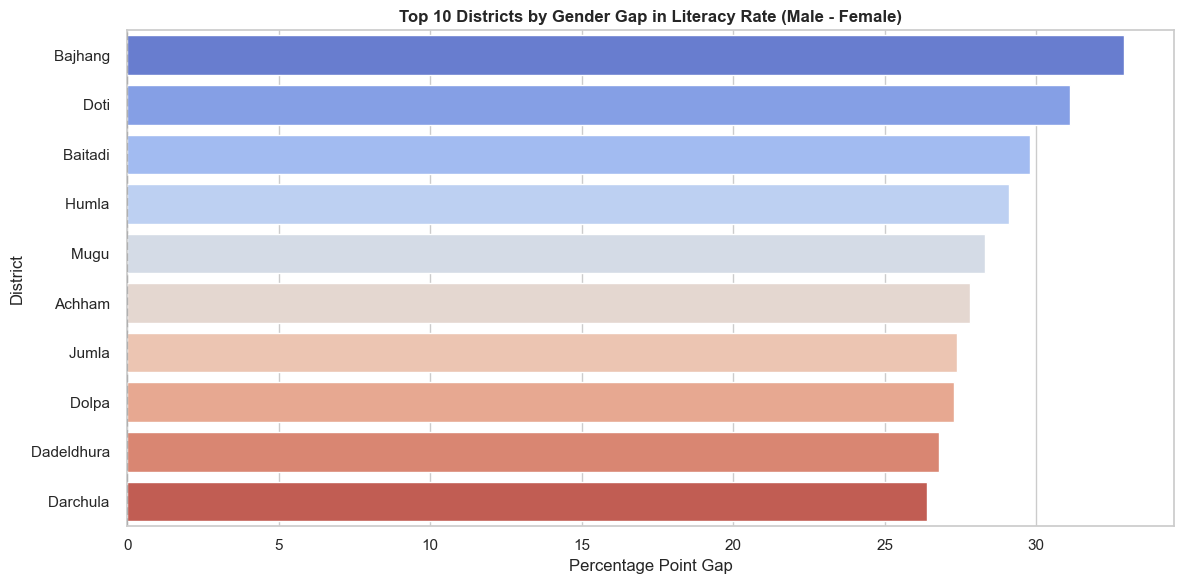

In [11]:
plt.figure(figsize=(12, 6))
sorted_gap = df.sort_values('Gender_Gap', ascending=False).head(10)  # Top 10 largest gaps
sns.barplot(data=sorted_gap, x='Gender_Gap', y='District', palette='coolwarm')
plt.title("Top 10 Districts by Gender Gap in Literacy Rate (Male - Female)", fontweight='bold')
plt.xlabel("Percentage Point Gap")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()
